In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize
import os
import torch
from os.path import join
import json
# c = 'steelblue'
# base_c = 'lightskyblue'
import seaborn as sns
c = 'coral'
c1 = 'yellowgreen'
base_c = 'aqua'


plt.rcParams['text.usetex'] = False
sns.set(style="ticks")
plt.rc('font', family='serif')
plt.rc('font', serif='STIXGeneral')

yaxisfont=45
bigfont = 27 + 5
medfont = 20 + 5
smallfont = 17

plt.rcParams['xtick.labelsize']=medfont
plt.rcParams['ytick.labelsize']=medfont

sns.set_style('ticks', {'font.family':'serif', 'font.serif':'Times New Roman', 'font.size': 16})

sns.set_palette("muted")
from collections import defaultdict
ticks_fontsize = 18
label_fontsize = 20
cbar_fontsize = 18
sns.set_style('ticks', {'font.family':'serif', 'font.serif':'Times New Roman', 'font.size': 16})


setting: baseline, alpha mean: 1.754469320178032, alpha std: 0.17267357812027906
setting: adam_tb, alpha mean: 1.7647191074987252, alpha std: 0.16503523413601776


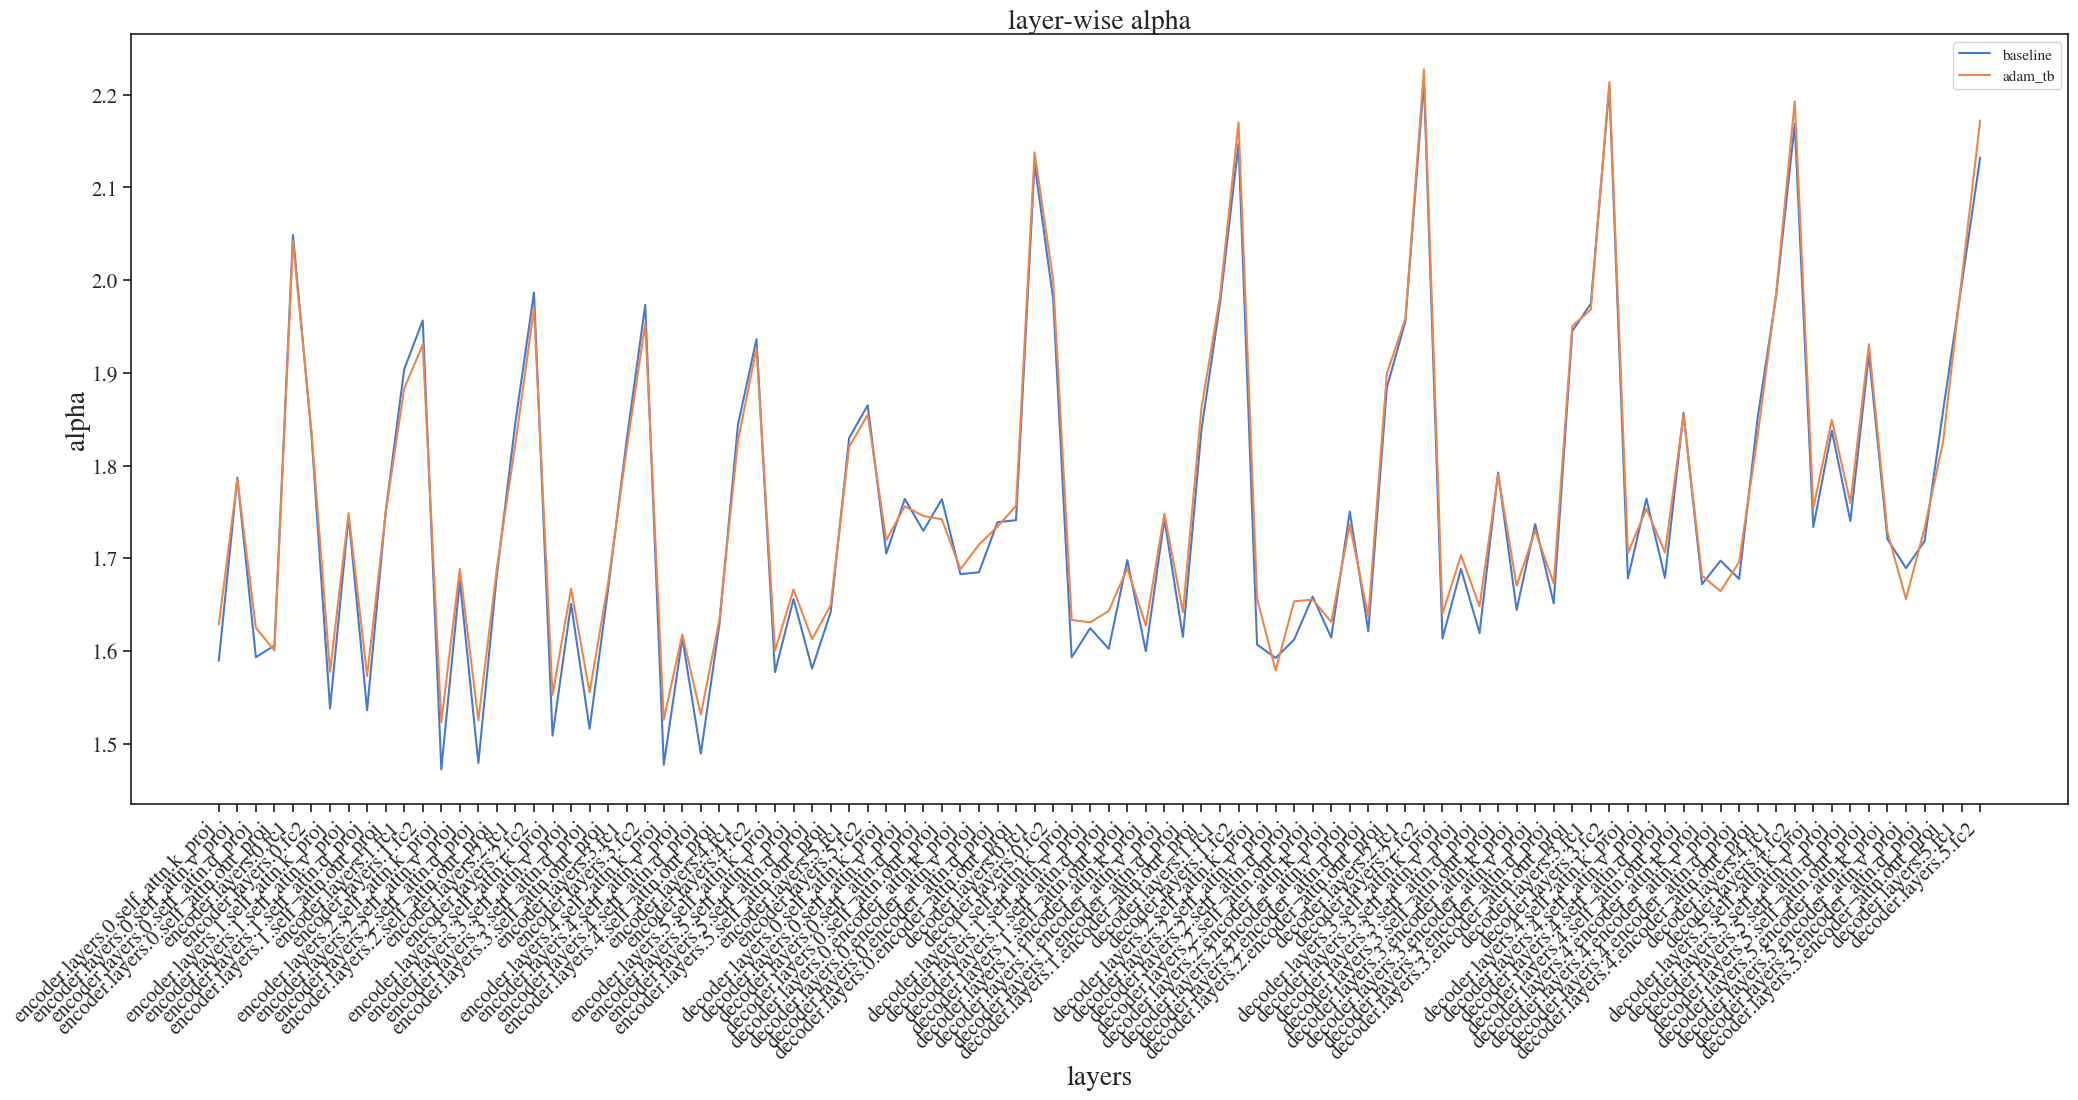

In [10]:
base_dir = '/scratch/tpang/zhliu/checkpoints/nlp/mt/iwslt14_de_en'
settings = ['baseline', 'adam_tb']
plt.figure(figsize=(25, 10))
for setting in settings:
    if setting == 'baseline':
        dir = os.path.join(base_dir, 'baseline/transformer_iwslt_de_en_v2_iwslt14_de_en_seed43')
    elif setting == 'adam_tb':
        dir = os.path.join(base_dir, 'adam_tb/transformer_iwslt_de_en_v2_iwslt14_de_en_seed43/after_warmup_True_tb_linear_map_alpha/min_0.6_slope0.8_xmin_mid_mid_pos2')

    metrics = np.load(join(dir, 'metrics_update60500.npy'), allow_pickle=True).item()
    layer_names = metrics['longname']
    alpha = metrics['alpha']
    plt.plot(alpha, label=setting)
    print(f'setting: {setting}, alpha mean: {np.mean(alpha)}, alpha std: {np.std(alpha)}')

plt.legend()
plt.xlabel('layers', fontsize=label_fontsize)
plt.xticks(rotation=45, ha='right')
plt.xticks(np.arange(len(layer_names)), layer_names, fontsize=15)
plt.ylabel('alpha', fontsize=label_fontsize)
plt.title('layer-wise alpha', fontsize=label_fontsize)
plt.show()


dict_keys(['alpha', 'spectral_norm', 'D', 'longname', 'eigs'])
['encoder.layers.0.self_attn.k_proj', 'encoder.layers.0.self_attn.v_proj', 'encoder.layers.0.self_attn.q_proj', 'encoder.layers.0.self_attn.out_proj', 'encoder.layers.0.fc1', 'encoder.layers.0.fc2', 'encoder.layers.1.self_attn.k_proj', 'encoder.layers.1.self_attn.v_proj', 'encoder.layers.1.self_attn.q_proj', 'encoder.layers.1.self_attn.out_proj', 'encoder.layers.1.fc1', 'encoder.layers.1.fc2', 'encoder.layers.2.self_attn.k_proj', 'encoder.layers.2.self_attn.v_proj', 'encoder.layers.2.self_attn.q_proj', 'encoder.layers.2.self_attn.out_proj', 'encoder.layers.2.fc1', 'encoder.layers.2.fc2', 'encoder.layers.3.self_attn.k_proj', 'encoder.layers.3.self_attn.v_proj', 'encoder.layers.3.self_attn.q_proj', 'encoder.layers.3.self_attn.out_proj', 'encoder.layers.3.fc1', 'encoder.layers.3.fc2', 'encoder.layers.4.self_attn.k_proj', 'encoder.layers.4.self_attn.v_proj', 'encoder.layers.4.self_attn.q_proj', 'encoder.layers.4.self_attn.out_p

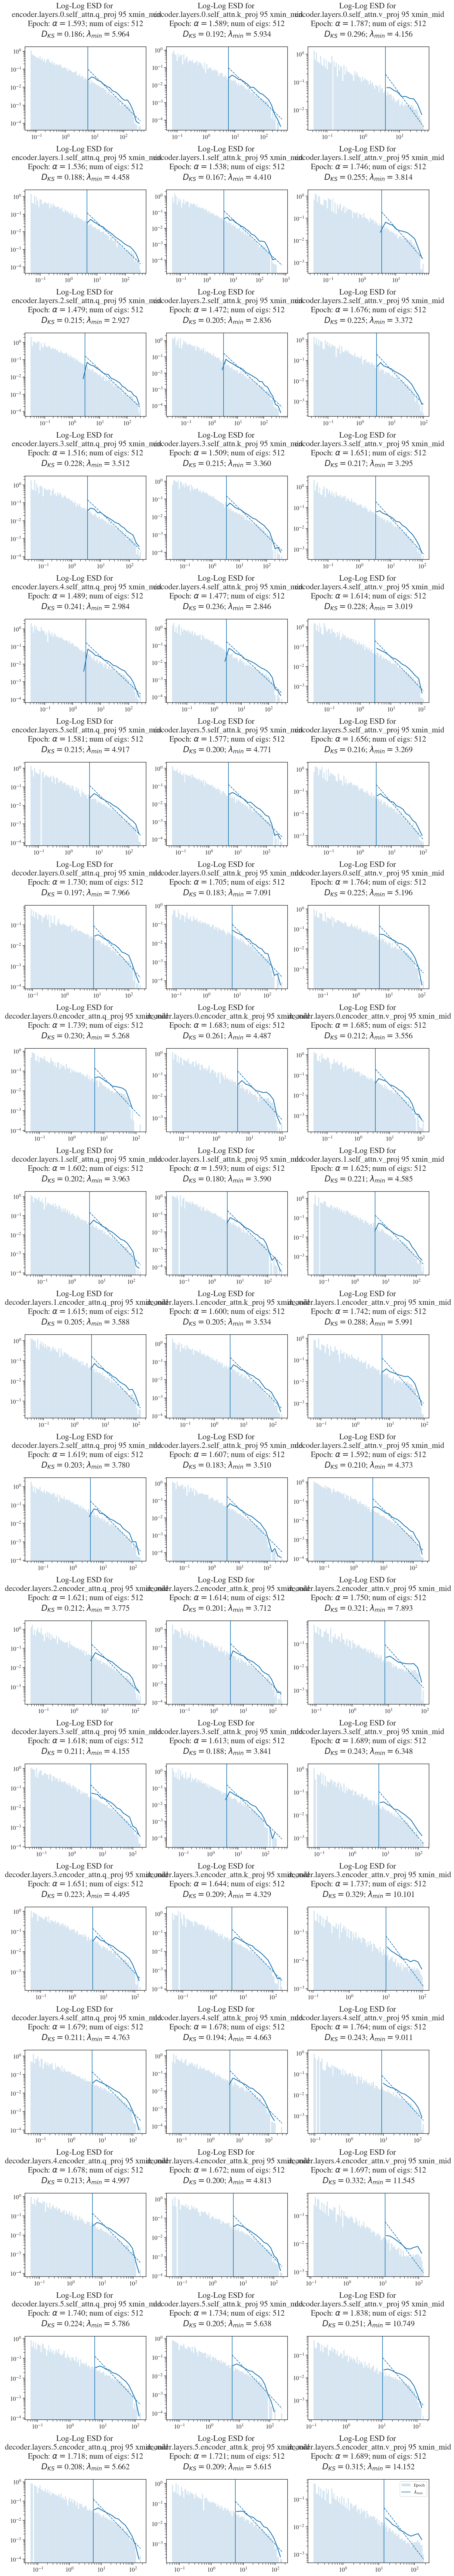

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import io
from contextlib import redirect_stdout, redirect_stderr

from collections import defaultdict
import matplotlib as mpl
import numpy as np
import powerlaw

params = {'axes.labelsize': 20,
         'axes.titlesize':20,
         'xtick.labelsize':12,
         'ytick.labelsize':15,
         'axes.titlepad': 1,
         'axes.labelpad': 1,
         'axes.grid': True,
          'legend.fontsize': 15
    }
mpl.rcParams.update(params)

import numpy as np
import matplotlib.pyplot as plt
import random
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable

import warnings
import matplotlib.cbook

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import json
import math

# c = 'steelblue'
# base_c = 'lightskyblue'
import seaborn as sns
c = 'coral'
c1 = 'yellowgreen'
base_c = 'aqua'

plt.rcParams['text.usetex'] = False
sns.set(style="ticks")
plt.rc('font', family='serif')
plt.rc('font', serif='STIXGeneral')

yaxisfont=45
bigfont = 27 + 5
medfont = 15 
smallfont = 17

plt.rcParams['xtick.labelsize']=medfont
plt.rcParams['ytick.labelsize']=medfont
plt.rcParams['axes.titlesize']=medfont

sns.set_style('ticks', {'font.family':'serif', 'font.serif':'Times New Roman', 'font.size': 16})

sns.set_palette("muted")
cmap = sns.color_palette("tab10")
ticks_fontsize = 18
label_fontsize = 20
cbar_fontsize = 18


EVALS_THRESH = 0.00001
thresh = EVALS_THRESH
XMIN_PEAK = 'xmin_peak'
XMIN_MID = 'xmin_mid'
POWER_LAW = 'power_law'
TRUNCATED_POWER_LAW='truncated_power_law'

def pl_fit(data=None, xmin=None, xmax=None, verbose=False, distribution='PL'):
    f = io.StringIO()
    with redirect_stdout(f), redirect_stderr(f), warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=RuntimeWarning)
        return powerlaw.Fit(data, xmin=xmin, xmax=xmax, 
                verbose=verbose, distribution=distribution, 
                xmin_distribution=distribution)

def plot_loghist(ax, x, bins, xmin, legend, color):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    ax.hist(x, bins=logbins, density=True, alpha=0.2, label=legend, color=color)

    if xmin:
        ax.axvline(xmin, color=color, label=r'$\lambda_{min}$')

    ax.set_xscale('log')

def plot_hill(ax, xmin, sorted_eigs, final_alpha, num=1, cols=3, title=''):
    
    truncated_eigs = sorted_eigs[sorted_eigs > xmin]
    
   #plt.figure(figsize=(6, 4.5))
    #print(num)
    fig2 = powerlaw.plot_pdf(data=truncated_eigs, linear_bins=False, color='b', linewidth=0, ax=ax)
    fig2 = powerlaw.plot_pdf(data=truncated_eigs, color='r', linewidth=2, ax=ax)

    bins = np.unique(truncated_eigs)
    PDF = (bins ** -final_alpha) * (final_alpha-1) * (xmin**(final_alpha-1))
    assert np.min(PDF) > 0
    ax.plot(bins, PDF, color='r', linestyle='--', linewidth=2)
    ax.set_xscale("log")
    ax.set_yscale("log")
    
    min_evals_to_plot = (xmin/100)
    ax.set_title(title, fontsize=20)
    ax.set_xticks(fontsize=15)
    ax.set_yticks(fontsize=15)
    evals_to_plot = sorted_eigs[sorted_eigs > min_evals_to_plot]
    plot_loghist(ax, evals_to_plot, bins=100, xmin=xmin, legend=f'Epoch={epoch}', color=cmap[c_idx])

qkv_names = ['q_layer', 'k_layer', 'v_layer']
device = torch.device('cuda')
distribution = 'power_law' #truncated_ truncated_
fit_type=distribution
fix_fingers='xmin_mid' #"xmin_peak"
evaluated_epochs = [150]
eval_dirs = [
    '/scratch/tpang/zhliu/checkpoints/nlp/mt/iwslt14_de_en/baseline/transformer_iwslt_de_en_v2_iwslt14_de_en_seed43'
]

alpha_list = []

for c_idx, eval_dir in enumerate(eval_dirs):
    fig, axs = plt.subplots(18, 3, figsize=(15, 90))
    metric_dir = os.path.join(eval_dir, 'metrics_update60500.npy')
    metrics = np.load(metric_dir, allow_pickle=True).item()
    print(metrics.keys())
    print(metrics['longname'])
    q_layer_idxs = []
    k_layer_idxs = []
    v_layer_idxs = []
    q_eigs_list = []
    k_eigs_list = []
    v_eigs_list = []
    for layer_idx, layer_name in enumerate(metrics['longname']):
        if 'q_proj' in layer_name:
            q_layer_idxs.append(layer_idx)
            q_eigs_list.append(metrics['eigs'][layer_idx])
        elif 'k_proj' in layer_name:
            k_layer_idxs.append(layer_idx)
            k_eigs_list.append(metrics['eigs'][layer_idx])
        elif 'v_proj' in layer_name:
            v_layer_idxs.append(layer_idx)
            v_eigs_list.append(metrics['eigs'][layer_idx])

    for qkv_idx, (layer_idxs, eigs_list) in enumerate(zip([q_layer_idxs, k_layer_idxs, v_layer_idxs], [q_eigs_list, k_eigs_list, v_eigs_list])):
        for idx, (layer_id, evals) in enumerate(zip(layer_idxs, eigs_list)):
            name = metrics['longname'][layer_id]
            title = f'Log-Log ESD for \n {name} {layer_idx} {fix_fingers}\n'
            ax = axs[idx, qkv_idx]
            xmax = np.max(evals)
            if fix_fingers==XMIN_PEAK:
                print("fix the fingers by setting xmin to the peak of the ESD")
                nz_evals = evals[evals > thresh]
                num_bins = 100  # np.min([100, len(nz_evals)])
                h = np.histogram(np.log10(nz_evals), bins=num_bins)
                ih = np.argmax(h[0])
                xmin2 = 10 ** h[1][ih]
                xmin_range = (math.log10(0.95 * xmin2), 1.5 * xmin2)
                fit = pl_fit(data=nz_evals, xmin=xmin_range,
                    xmax=xmax, verbose=False, 
                    distribution=distribution)

            elif fix_fingers==XMIN_MID:
                print("fix the fingers by setting xmin to the mid of the ESD")
                nz_evals = evals[evals > thresh]
                i = len(nz_evals) // 2
                xmin = nz_evals[i]
                fit = pl_fit(data=nz_evals, xmin=xmin,
                    xmax=xmax, verbose=False, 
                    distribution=distribution)

            else: 
                print("powerlaw.Fit no xmin , distribution={} ".format(distribution))
                nz_evals = evals[evals > thresh]
                fit = pl_fit(data=nz_evals, xmax=xmax, verbose=False, distribution=distribution) 
            
            xmin = fit.xmin
            alpha = fit.alpha
            D = fit.D
            if fit_type==TRUNCATED_POWER_LAW:
                alpha = fit.truncated_power_law.alpha
                Lambda = fit.truncated_power_law.Lambda
                D = fit.truncated_power_law.D

            fig2 = fit.plot_pdf(color='b', linewidth=0, ax=ax) # invisbile
            fig2 = fit.plot_pdf(color=cmap[c_idx], linewidth=2, ax=ax) #color='orange',
            if fit_type==POWER_LAW:
                fit.power_law.plot_pdf(color=cmap[c_idx], linestyle='--', ax=ax) #color='r',
                title = title + rf"Epoch: $\alpha=${alpha:.3f}; " + \
                    f"num of eigs: {len(evals)}" + "\n" + \
                    r'$D_{KS}=$'+"{0:.3f}; ".format(D) + \
                    r"$\lambda_{min}=$"+"{0:.3f}".format(xmin) + "\n" 
                    # f"original alpha: {alpha_:.3f}"
            else:
                fit.truncated_power_law.plot_pdf(color=cmap[c_idx], linestyle='--', ax=ax)
                title = title + rf"Epoch: $\alpha=${alpha:.3f}; " + \
                    r'$D_{KS}=$'+"{0:.3f}; ".format(D) + \
                    r'$Lambda=$'+"{0:.3f};".format(Lambda) + \
                    r"$\lambda_{min}=$"+"{0:.3f}".format(xmin) + "\n"

            alpha_list.append(alpha)

            plot_loghist(ax, evals[evals>(xmin/100)], 
                        bins=100, xmin=xmin, legend=f'Epoch', color=cmap[c_idx])
            ax.set_title(title, fontsize=20)

    # plt.suptitle(title)
    plt.legend()
    plt.tight_layout()
    string = ''
    for e in evaluated_epochs:
        string = string + f'_{e}'
    # plt.savefig(f"results/epoch_{string}_dist{distribution}_{fix_fingers}.png")
    plt.show()
            

In [5]:
palettes = [sns.color_palette('pastel')[0], sns.color_palette('Set2')[-2], 
            sns.color_palette("Set2")[1],
                sns.color_palette('flare')[2]]  

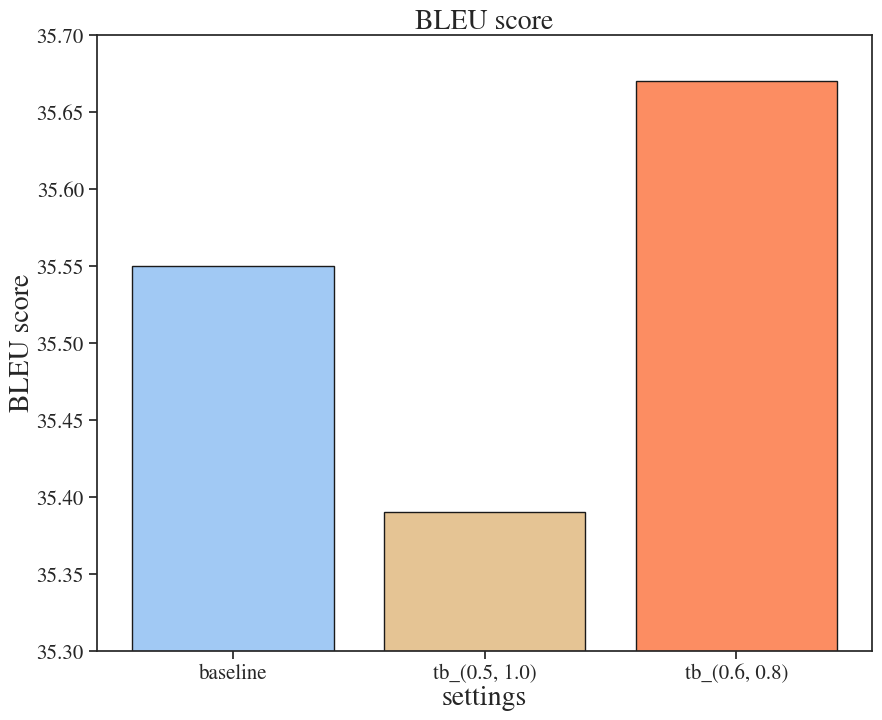

In [8]:
bleus = [35.55, 35.39, 35.67]
names = ['baseline', 'tb_(0.5, 1.0)', 'tb_(0.6, 0.8)']
fig, ax = plt.subplots(figsize=(10, 8))
bar_plot = ax.bar(names, height=bleus, color=palettes, edgecolor='k')
plt.xlabel('settings', fontsize=20)
plt.ylabel('BLEU score', fontsize=20)
plt.ylim(35.3, 35.7)
plt.title('BLEU score', fontsize=20)
plt.show()

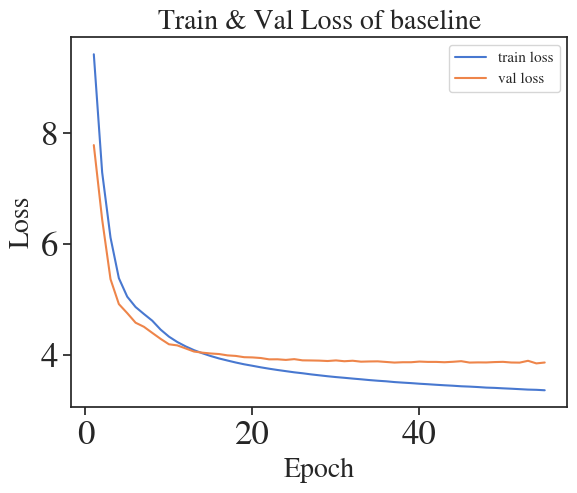

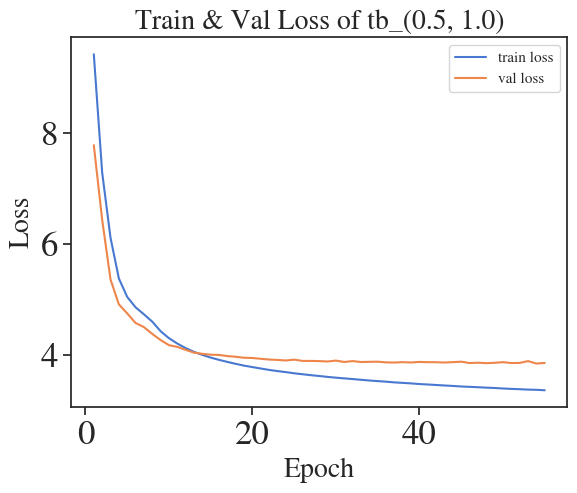

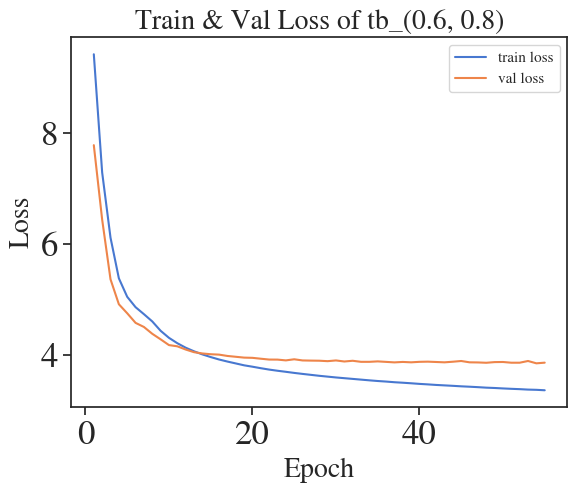

In [4]:
dir_dict = {
    'baseline': '/scratch/tpang/zhliu/checkpoints/nlp/mt/iwslt14_de_en/baseline/transformer_iwslt_de_en_v2_iwslt14_de_en_seed43/stats',
    'tb_(0.5, 1.0)': '/scratch/tpang/zhliu/checkpoints/nlp/mt/iwslt14_de_en/adam_tb/transformer_iwslt_de_en_v2_iwslt14_de_en_seed43/after_warmup_True_tb_linear_map_alpha/min_0.5_slope1.0_xmin_mid_mid_pos2/stats',
    'tb_(0.6, 0.8)': '/scratch/tpang/zhliu/checkpoints/nlp/mt/iwslt14_de_en/adam_tb/transformer_iwslt_de_en_v2_iwslt14_de_en_seed43/after_warmup_True_tb_linear_map_alpha/min_0.6_slope0.8_xmin_mid_mid_pos2/stats',
}

for key in dir_dict.keys():
    train_stats_dir = os.path.join(dir_dict[key], 'epoch_stats.csv')
    val_stats_dir = os.path.join(dir_dict[key], 'val_stats.csv')

    plt.plot(figsize=(10, 8))
    train_stats = pd.read_csv(train_stats_dir)
    val_stats = pd.read_csv(val_stats_dir)
    plt.plot(train_stats['epoch'], train_stats['loss'], label='train loss')
    plt.plot(val_stats['epoch'], val_stats['loss'], label='val loss')

    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('Loss', fontsize=20)
    plt.legend()
    plt.title(f'Train & Val Loss of {key}', fontsize=20)
    plt.show()

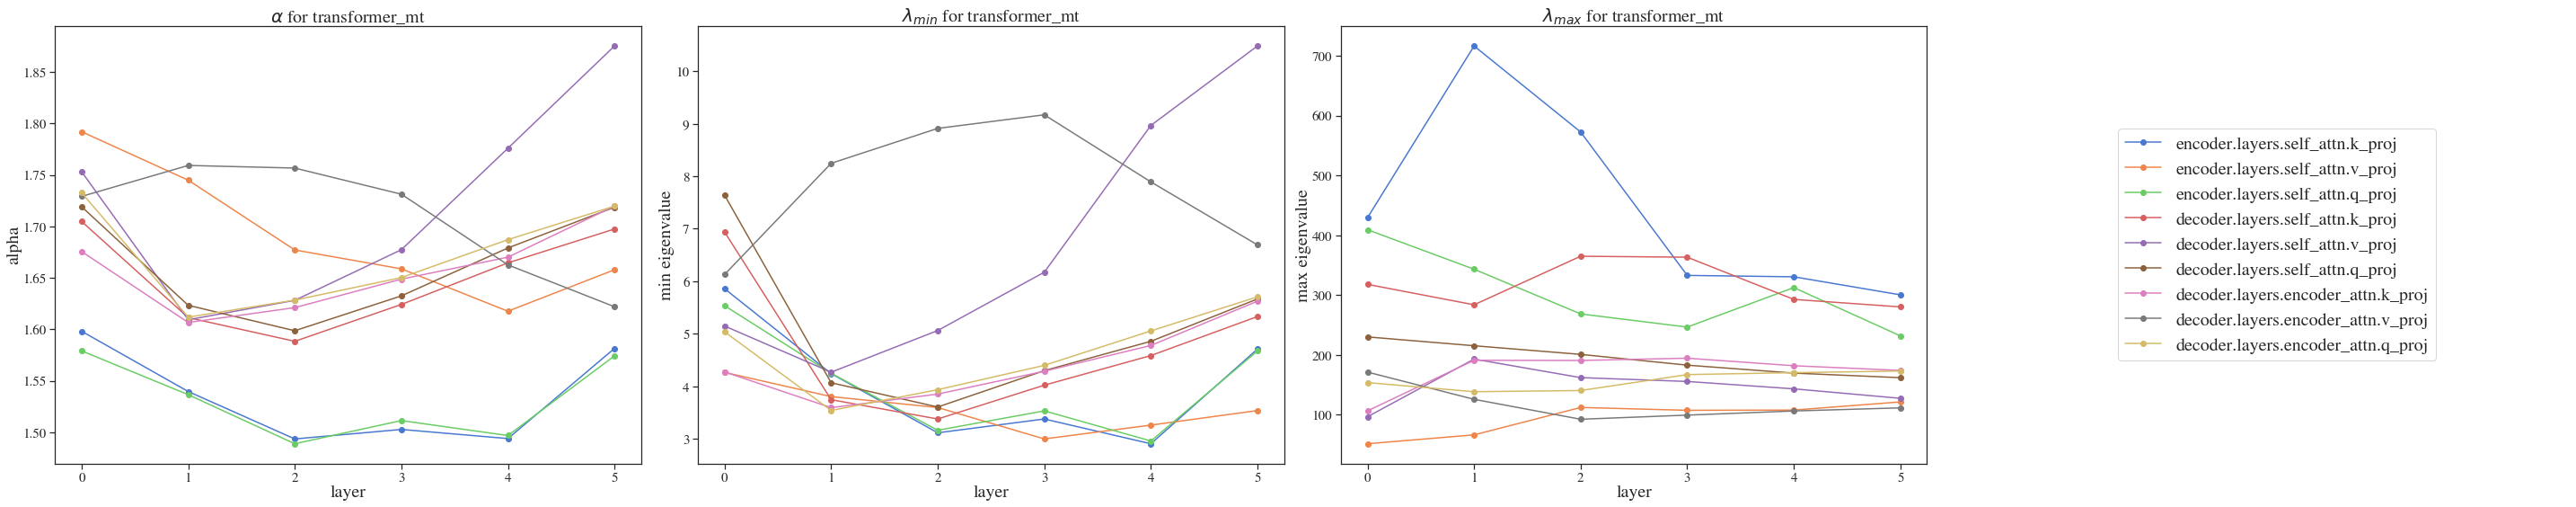

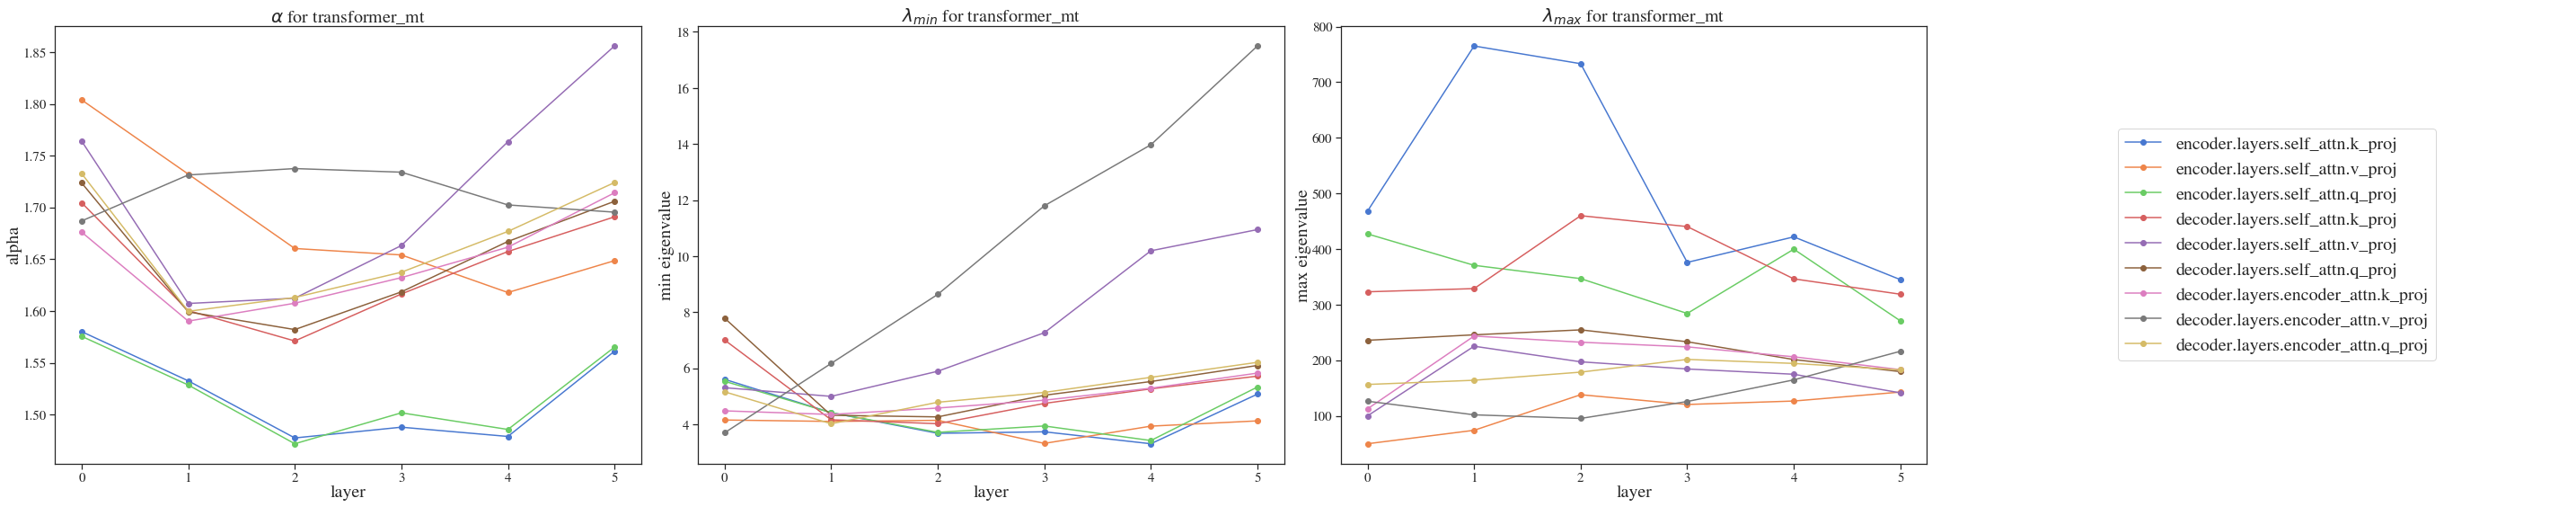

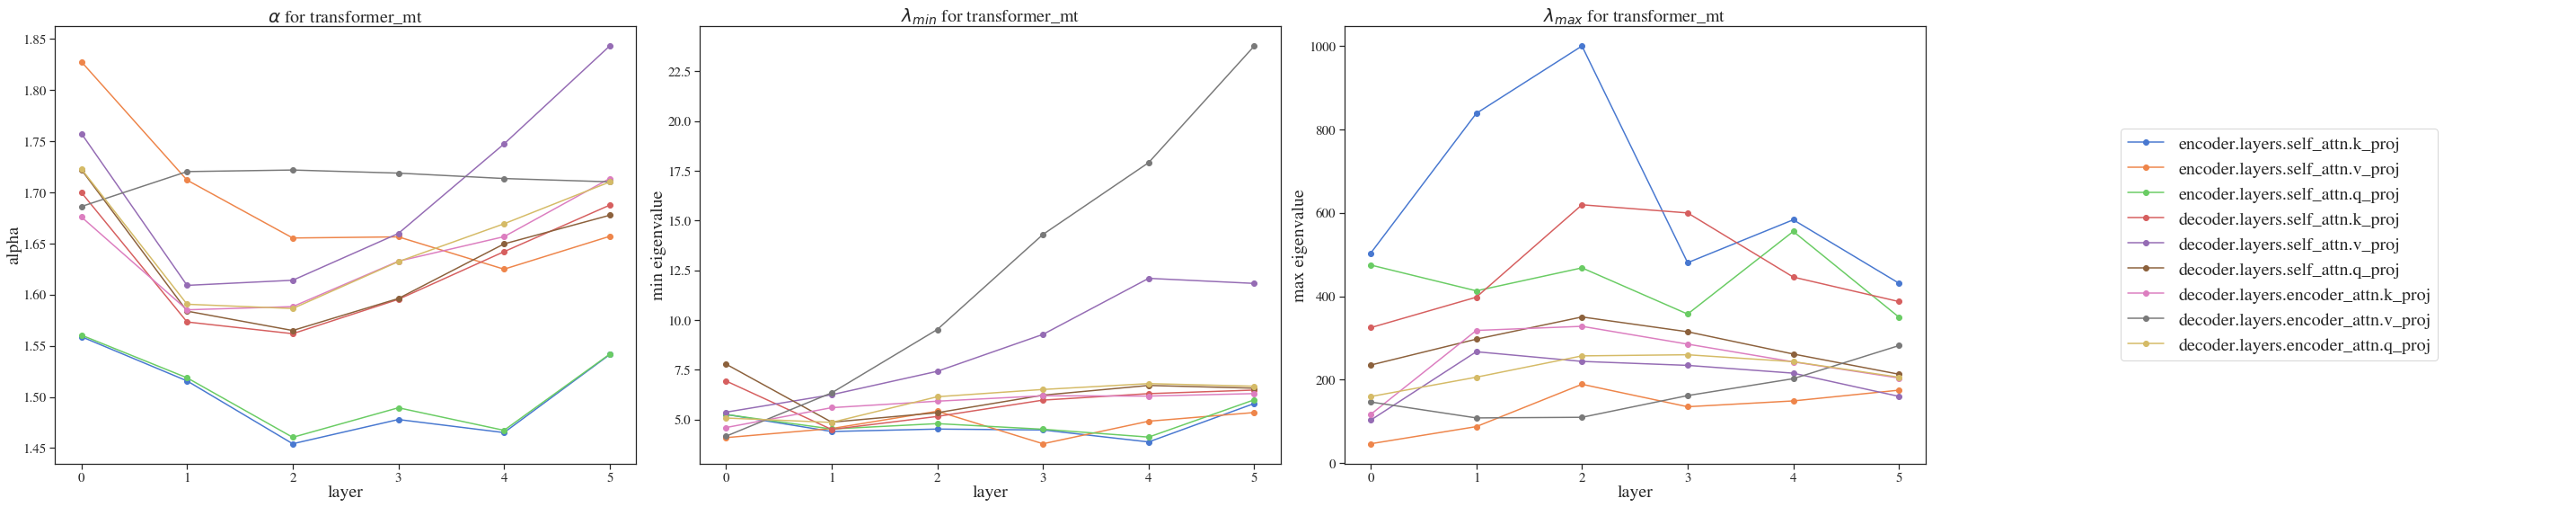

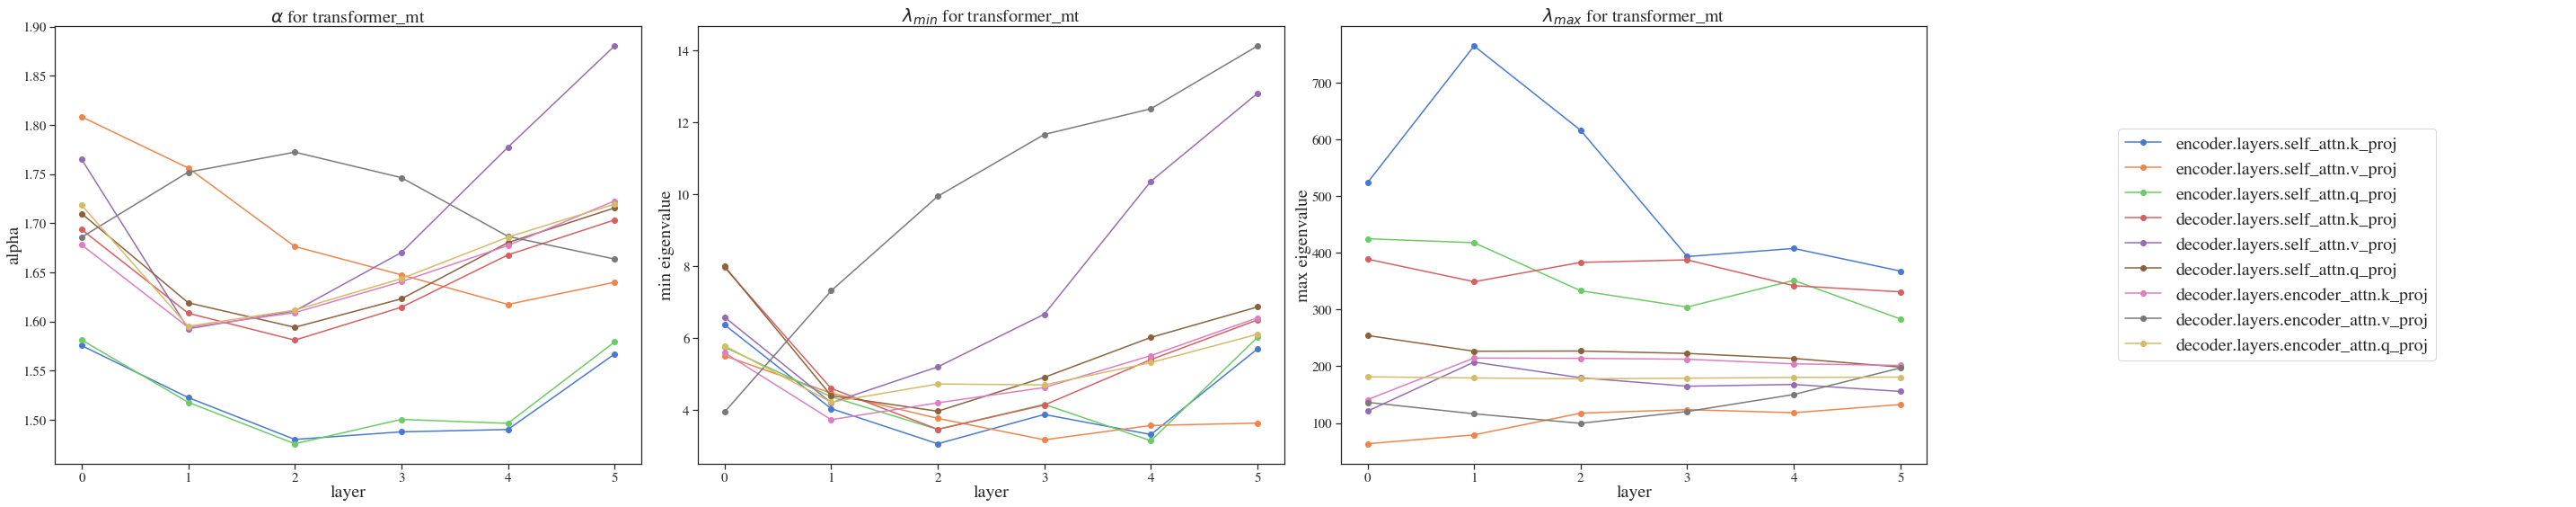

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import io
from contextlib import redirect_stdout, redirect_stderr
import powerlaw
import re

from collections import defaultdict
import matplotlib as mpl
import numpy as np

params = {'axes.labelsize': 20,
         'axes.titlesize':20,
         'xtick.labelsize':12,
         'ytick.labelsize':15,
         'axes.titlepad': 1,
         'axes.labelpad': 1,
         'axes.grid': True,
          'legend.fontsize': 15
    }
mpl.rcParams.update(params)

import numpy as np
import matplotlib.pyplot as plt
import random
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable

import warnings
import matplotlib.cbook


from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import json

# c = 'steelblue'
# base_c = 'lightskyblue'
import seaborn as sns
c = 'coral'
c1 = 'yellowgreen'
base_c = 'aqua'

plt.rcParams['text.usetex'] = False
sns.set(style="ticks")
plt.rc('font', family='serif')
plt.rc('font', serif='STIXGeneral')

yaxisfont=45
bigfont = 27 + 5
medfont = 15 
smallfont = 17

plt.rcParams['xtick.labelsize']=medfont
plt.rcParams['ytick.labelsize']=medfont
plt.rcParams['axes.titlesize']=medfont

sns.set_style('ticks', {'font.family':'serif', 'font.serif':'Times New Roman', 'font.size': 16})

sns.set_palette("muted")
cmap = sns.color_palette("tab10")
ticks_fontsize = 18
label_fontsize = 20
cbar_fontsize = 18


def list_directories(path):
    """
    List all directories under the given path and return them as a list of strings.

    :param path: The path of the directory to list subdirectories from.
    :return: A list of strings, each representing a subdirectory.
    """
    directories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
    return directories

task = 'mt_iwslt14'
model = 'transformer'
config_dict = {
    'baseline': '/data/yefan0726/checkpoints/zihang/nlp/mt/iwslt14_de_en/baseline/transformer_iwslt_de_en_v2_iwslt14_de_en_seed43',
    'group_tb_1.2': '/data/yefan0726/checkpoints/zihang/nlp/mt/iwslt14_de_en/adam_group_tb/transformer_iwslt_de_en_v2_iwslt14_de_en_seed43/lr_scale_1.2',
    'group_tb_1.5': '/data/yefan0726/checkpoints/zihang/nlp/mt/iwslt14_de_en/adam_group_tb/transformer_iwslt_de_en_v2_iwslt14_de_en_seed43/lr_scale_1.5',
    'group_tb_1.2_spectralnorm': '/data/yefan0726/checkpoints/zihang/nlp/mt/iwslt14_de_en/adam_group_tb/transformer_iwslt_de_en_v2_iwslt14_de_en_seed43/lr_scale_1.2_metric_spectral_norm',
}


distribution = 'power_law' #truncated_ truncated_
fit_type=distribution
fix_fingers="xmin_mid" #"xmin_peak"
c_idx = 0
model_name = 'transformer_mt'

for config, ckpt_dir in config_dict.items():
    seed_dir = ckpt_dir

    first_esd = np.load(os.path.join(seed_dir, 'metrics_update0.npy'), allow_pickle=True).item()
    layer_names = first_esd['longname']
    layer_dict = {}

    # parse and group layer names
    for idx, layer in enumerate(layer_names):
        # parse layer name to group different types of layers
        match = re.search(r'(.*?)\.(\d+)\.(.*)', layer)
        if match:
            before = match.group(1)
            index = int(match.group(2))
            after = match.group(3)

            type_name = before + '.' + after
            
            if type_name in layer_dict:
                layer_dict[type_name].append(idx)
            else:
                layer_dict[type_name] = []
                layer_dict[type_name].append(idx)

    final_metrics = np.load(os.path.join(seed_dir, f'metrics_update60000.npy'), allow_pickle=True).item()
    fig, axs = plt.subplots(1, 4, figsize=(40, 8))
    for layer_type, idxs in layer_dict.items():
        metric_list = {
            'alpha': [],
            r'$\lambda_min$': [],
            r'$\lambda_max$': [],
        }
        # plot alpha
        layer_count = len(idxs)
        for idx in idxs:
            evals = final_metrics['eigs'][idx]
            evals = np.sort(evals)
            xmax = np.max(evals)
            xmin_pos = int(len(evals) / 2)
            xmin = evals[xmin_pos]
            metric_list['alpha'].append(final_metrics['alpha'][idx])
            metric_list[r'$\lambda_min$'].append(xmin)
            metric_list[r'$\lambda_max$'].append(xmax)
        # plot list
        if 'q' in layer_type or 'k' in layer_type or 'v' in layer_type:
            axs[0].plot(metric_list['alpha'], marker='o', label=layer_type)
            axs[1].plot(metric_list[r'$\lambda_min$'], marker='o', label=layer_type)
            axs[2].plot(metric_list[r'$\lambda_max$'], marker='o', label=layer_type)

    axs[0].set_xlabel('layer', fontsize=20)
    axs[0].set_ylabel('alpha', fontsize=20)
    axs[0].set_title(r"$\alpha$" + f" for {model_name}", fontsize=20)
    # axs[0].legend()

    axs[1].set_xlabel('layer', fontsize=20)
    axs[1].set_ylabel('min eigenvalue', fontsize=20)
    axs[1].set_title(r"$\lambda_{min}$" + f" for {model_name}", fontsize=20)
    # axs[1].legend()

    axs[2].set_xlabel('layer', fontsize=20)
    axs[2].set_ylabel('max eigenvalue', fontsize=20)
    axs[2].set_title(r"$\lambda_{max}$" f' for {model_name}', fontsize=20)
    # axs[2].legend()

    # Prepare the fourth subplot for the legend
    axs[3].axis('off')  # Turn off the axis

    # Extract handles and labels from one of the plots
    handles, labels = axs[0].get_legend_handles_labels()

    # Display the legend in the fourth subplot
    legend_fontsize = 20
    axs[3].legend(handles, labels, loc='center', fontsize=legend_fontsize)

    plt.tight_layout()
    # if not os.path.exists('/Users/henryliu/Downloads/model_diagnostics/figures'):
    #     os.mkdir('/Users/henryliu/Downloads/model_diagnostics/figures')
    # plt.savefig(f'/Users/henryliu/Downloads/model_diagnostics/figures/{model_name}_metrics.png')
    plt.show()